In [57]:
import pandas as pd
import numpy as np
import re

pd.options.display.max_columns = None

### `Question-1:`

The dataset is based on NFTs. This is quite large. So, when you will read the dataset, you have to wait. The link of the dataset: https://tinyurl.com/2pfhncqw

Your task is to make a pivote table by using the columns "verification_status", "contract_type", "rarity_score" and "last_sale_price" to find out the total values.

In [58]:
df=pd.read_csv("data3/nfts_train.csv")

In [59]:
df=df.drop(columns=['Unnamed: 0'])

In [60]:
df.pivot_table(index="verification_status", columns="contract_type", values=["rarity_score","last_sale_price"])

last_sale_price           rarity_score           
contract_type               default       own      default        own
verification_status                                                  
approved                   0.005466  0.168499  3296.041909  393.00000
verified                   0.018829  4.178975   125.845700  260.83758

In [61]:
#alternate method
df.groupby(["verification_status","contract_type"])[['last_sale_price','rarity_score']].mean().unstack()

last_sale_price           rarity_score           
contract_type               default       own      default        own
verification_status                                                  
approved                   0.005466  0.168499  3296.041909  393.00000
verified                   0.018829  4.178975   125.845700  260.83758

### `Question-2:`

You are given a dataset about the cars' price and miles driven of different cars throughout the different years. The link of the dataset: https://tinyurl.com/2r24n45l. Your tasks are
- make a pivot table of the brands (the required brands are given below) from the "Year" 2018 to the year 2022 in which the "Price" is shown as average values and "Miles" are in median values. In this pivote table, every row represents a particular brand and each column represents either average "Price" of a partucular year or median values of "Miles" of a particular year.
- At the end plot a kde chart for the "Price" and "Miles" by using your pivot table.

There are some challenges to solve this task:
- There is no column that is represented to the brand name of the car. You have to find out on your own.
- Some values of "Years" column are misleading. You have to reset this column too that every value should tell a valid meaning.

In [62]:
q2df=pd.read_csv("data3/carvana.csv")
q2df

,Name,Year,Miles,Price
0,Chevrolet Trax,2018,41946,16990
1,GMC Terrain,2020,45328,23990
2,Jeep Wrangler,2012,81068,21590
3,Jeep Renegade,2019,35372,21590
4,BMW X,20173,68992,22990
...,...,...,...,...
21995,Honda Accord,2014,98085,17590
21996,Dodge Charger,2016,62616,23990
21997,Ford Taurus,2013,50345,16990
21998,Toyota Corolla Hatchback,2020,27945,23990


In [63]:
sample_df=q2df[(q2df.Year>=2018)&(q2df.Year<=2022)]

In [64]:
sample_df['Brand Name']=sample_df.Name.str.split(" ").str.get(0)

/tmp/ipykernel_5683/1523636396.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df['Brand Name']=sample_df.Name.str.split(" ").str.get(0)


In [65]:
sample_df

,Name,Year,Miles,Price,Brand Name
0,Chevrolet Trax,2018,41946,16990,Chevrolet
1,GMC Terrain,2020,45328,23990,GMC
3,Jeep Renegade,2019,35372,21590,Jeep
5,Buick Encore,2019,47973,18590,Buick
24,Mitsubishi Eclipse Cross,2018,85475,16990,Mitsubishi
...,...,...,...,...,...
21976,Jeep Renegade,2020,63054,20590,Jeep
21978,Nissan Versa,2022,9975,22990,Nissan
21982,Nissan Murano,2019,38638,24990,Nissan
21987,Volkswagen Tiguan,2019,42636,24990,Volkswagen


In [66]:
pivot_df=sample_df.pivot_table(index="Brand Name", columns="Year", aggfunc={"Price":"mean","Miles":"median"})
pivot_df

Miles                                             Price  \
Year              2018     2019     2020     2021     2022          2018   
Brand Name                                                                 
Acura          32516.0  50959.0  30894.0  10922.0      NaN  25323.333333   
Alfa           38908.0  20928.0      NaN      NaN      NaN  28490.000000   
Audi               NaN      NaN      NaN  11205.0      NaN           NaN   
Buick          50702.0  41152.0  36626.0  39884.0    372.0  21516.254545   
Cadillac       56573.0  28645.5  41046.0      NaN      NaN  27590.000000   
Chevrolet      53252.0  46382.0  50095.0  38255.0  15117.0  20917.766917   
Chrysler       67400.0  65963.0  33444.0  48027.5  24427.0  25006.100000   
Dodge          78986.0  65497.0  30995.5  32159.5   9089.0  20807.283951   
Ford           50238.0  47203.0  49136.0  17635.5   5298.5  19529.978903   
GMC            54181.0  54017.0  55721.0  43029.0  10246.5  24797.555556   
Honda          46242.0  39322.0  35812.0   9286.0  18500.0  24265.054054   
Hyundai        56075.0  44910.0  35882.5  31592.0   8876.0  19335.487603   
Jaguar         35119.0  30563.0  17456.0   6943.0      NaN  33323.333333   
Jeep           53690.5  21836.5  41416.0  44188.5   8662.5  21362.570175   
Kia            37993.0  27189.0  37605.0  32877.0  14899.0  21565.608108   
Land           58929.0  41484.0  36232.0      NaN      NaN  39990.000000   
Lexus          53174.0  25356.5  21377.5  18073.0  20985.0  36056.666667   
Lincoln        43874.0  23501.5  50080.0      NaN   9494.0  26462.785714   
MINI           36562.0  57167.0      NaN      NaN      NaN  25910.000000   
Maserati           NaN  28766.0      NaN      NaN   5339.0           NaN   
Mercedes-Benz  31408.5  28937.0  22008.0  12435.0  10880.0  34910.000000   
Mitsubishi     65174.0  42786.0  46354.0  36398.0   6774.0  17576.206897   
Nissan         39266.0  37208.0  49741.0  41186.0   9975.0  20050.358209   
Porsche        47451.0      NaN      NaN      NaN      NaN  42590.000000   
Subaru         51900.0  40909.0  19885.0  44615.0   9899.0  23732.857143   
Tesla              NaN  34394.0  29891.5  26439.0   6454.0           NaN   
Toyota         45770.0  19796.0  35994.5  20862.0   8054.5  22644.640244   
Volkswagen     50991.0  46335.0  30069.0  28162.0  14056.5  21447.142857   
smart          14825.0      NaN      NaN      NaN      NaN  17765.000000   

                                                                        
Year                   2019          2020          2021           2022  
Brand Name                                                              
Acura          34496.777778  37590.000000  43856.666667            NaN  
Alfa           30475.714286           NaN           NaN            NaN  
Audi                    NaN           NaN  71990.000000            NaN  
Buick          21033.632653  24141.947368  25796.842105   26940.000000  
Cadillac       31590.000000  62199.000000           NaN            NaN  
Chevrolet      20828.634731  24188.992366  24584.842767   28010.000000  
Chrysler       26896.333333  30196.555556  28690.000000   35190.000000  
Dodge          23036.666667  26782.535714  32565.357143   36256.666667  
Ford           21677.625899  24510.070000  29725.218750   45485.333333  
GMC            23809.533333  26820.650000  33077.222222   34490.000000  
Honda          24635.039683  26273.500000  25889.470899   34710.000000  
Hyundai        21203.389831  22059.451220  23476.301370   28445.737705  
Jaguar         33990.000000  44390.000000  60723.333333            NaN  
Jeep           23255.171233  27072.555556  27614.642857   52023.333333  
Kia            23777.239748  22863.761062  23689.175258   28440.793651  
Land           40275.714286  51520.800000           NaN            NaN  
Lexus          37927.272727  42123.333333  47132.857143   45990.000000  
Lincoln        32515.000000  34523.333333           NaN   44590.000000  
MINI           27310.000000           NaN          

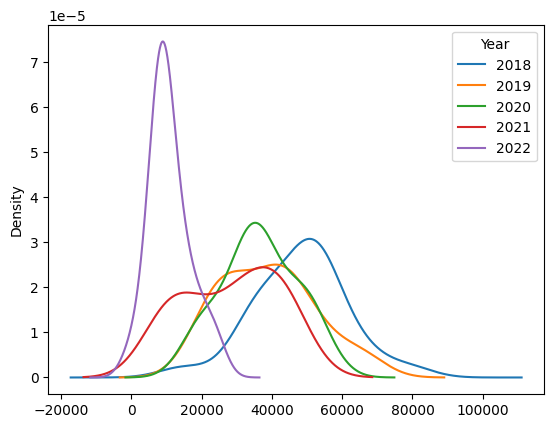

In [67]:
pivot_df['Miles'].plot(kind='kde');

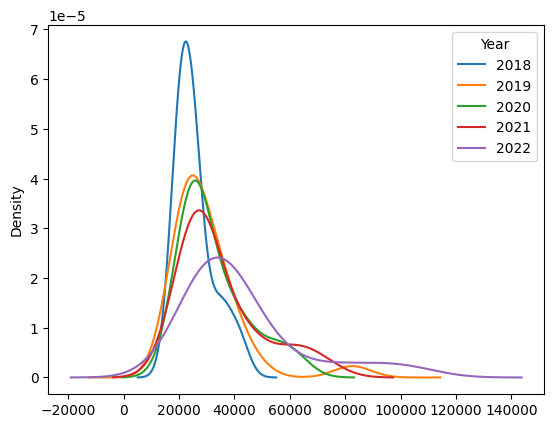

In [68]:
pivot_df['Price'].plot(kind='kde');

### `Question-3:`

You are given a dataset of **Daily Power Generation in India** of regional wise of all Power Stations. Link of the dataset: https://tinyurl.com/2nq6kugt

Task
- In this dataset, there are many columns. Two of them are `Actual(MU)` and `Excess(+) / Shortfall (-)`. `Actual(MU)` represents the actual power generation. `Excess(+) / Shortfall (-)` tells is that generated power is excess or shortfall for that particular day of a power station. You have to find out what should be the actual power generation required for that day by the power stations that there would not be any excess or shorfall power. For the result, make a new column.
- Find out the month of the day and store it as a new column.
- Find out top 10 frequently appeared power stations in this dataframe.
- Next create a pivot table of which every row represents a power station and every column represents a month in a order. Like January, February, March...
- It is hard to get inside if you look through the only pivot table. So plot the pivot table.

In [69]:
q3df=pd.read_csv("data3/PowerGeneration.csv")
q3df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0
...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0


In [70]:
# 1
q3df['Required']=q3df['Actual(MU)']-q3df['Excess(+) / Shortfall (-)']

In [71]:
q3df['Dates']=pd.to_datetime(q3df['Dates'])
q3df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345273 entries, 0 to 345272
Data columns (total 12 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   Dates                             345273 non-null  datetime64[ns]
 1   Power Station                     345273 non-null  object        
 2   Monitored Cap.(MW)                345273 non-null  float64       
 3   Total Cap. Under Maintenace (MW)  345273 non-null  float64       
 4   Planned Maintanence (MW)          345273 non-null  float64       
 5   Forced Maintanence(MW)            345273 non-null  float64       
 6   Other Reasons (MW)                345273 non-null  int64         
 7   Programme or Expected(MU)         345273 non-null  int64         
 8   Actual(MU)                        345273 non-null  int64         
 9   Excess(+) / Shortfall (-)         345273 non-null  float64       
 10  Deviation                       

In [72]:
#2
q3df['Month']=q3df.Dates.dt.month_name()
q3df

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation,Required,Month
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0,13.00,September
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0,28.80,September
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0,40.37,September
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0,13.57,September
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0,38.69,September
...,...,...,...,...,...,...,...,...,...,...,...,...,...
345268,2022-04-13,Tripura,137.0,32.00,0.00,0.0,32,0,1,0.29,0.0,0.71,April
345269,2022-04-13,NEEPCO.,2027.0,963.50,313.50,650.0,0,0,12,-1.59,0.0,13.59,April
345270,2022-04-13,NHPC,105.0,35.00,0.00,35.0,0,0,0,-0.72,0.0,0.72,April
345271,2022-04-13,NTPC Ltd.,750.0,250.00,0.00,250.0,0,0,11,4.45,0.0,6.55,April


In [73]:
#3
newq3=q3df['Power Station'].value_counts().sort_values(ascending=False).head(10)
newq3

Power Station
NTPC Ltd.    9570
GMR ENERG    5742
NHPC         5742
NPCIL        5742
JSWEL        3828
TATA PCL     3828
IBPIL        3828
APL          3828
JPPVL        3828
NLC          3828
Name: count, dtype: int64

In [74]:
#4
q3df_pivot_df=q3df.pivot_table(index="Power Station", columns="Month", values="Required")
q3df_pivot_df

Month,April,August,December,February,January,July,June,March,May,November,October,September
Power Station,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.569841,NaN
ABAN POWR,1.037667,1.054452,1.229209,1.025532,1.110581,1.086883,1.046533,0.951215,1.061048,1.150670,1.116909,1.000000
ACB,4.682583,4.976839,5.003446,5.205603,4.518387,5.327468,5.402267,5.035748,5.203065,5.103855,5.094121,5.218222
ACPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ADHPL,0.519417,3.680774,-0.017232,0.027234,0.019677,4.307208,3.295533,0.059299,1.927984,0.122346,0.812485,1.996444
...,...,...,...,...,...,...,...,...,...,...,...,...
VESPL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
VIP,4.750750,4.830710,5.580395,5.071631,5.924000,4.832208,5.088333,7.377804,4.747984,5.291899,5.885939,5.688667
VVL,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: xlabel='Power Station'>

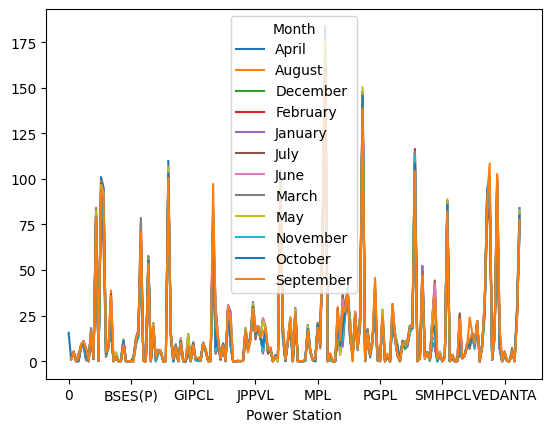

In [75]:
#5
q3df_pivot_df.plot()

### `Q-4` You are given a file `question-answer.csv`. Your task is to make a dataframe from it with two columns - `question` and `answers`.

* Questions in the file start from `Q<number>`; E.g.  `Q1` denotes question no. `1`
* Answers starts from `Ans<number>`; Eg. `Ans1` denotes answer of question no `1`
* MAke sure you look at columns name carefully

CSV File - "https://drive.google.com/file/d/10rmV3XrVtzpDTtYZF3UtCdcU0ajBJjGY/view?usp=share_link"

In [76]:
q4df=pd.read_csv("data3/question-answer.csv")
q4df

,Unnamed: 0,2
0,0,Q1-What is Data Science?
1,1,"Ans1-Data Science combines statistics, maths, ..."
2,2,Q2-2. How is logistic regression done?
3,3,Ans2-Logistic regression measures the relation...
4,4,Q3-How do you build a random forest model?
5,5,Ans3-A random forest is built up of a number o...
6,6,Q4-How can you avoid overfitting your model?
7,7,Ans4-Overfitting refers to a model that is onl...
8,8,Q5-You are given a data set consisting of vari...
9,9,Ans5-The following are ways to handle missing ...


In [77]:
q4df=q4df.drop(columns=['Unnamed: 0'])

In [78]:
ans_df=pd.DataFrame()

In [79]:
ans_df['Answers']=q4df['2'][1::2].values
ans_df['Questions']=q4df['2'][::2].values

In [80]:
ans_df

,Answers,Questions
0,"Ans1-Data Science combines statistics, maths, ...",Q1-What is Data Science?
1,Ans2-Logistic regression measures the relation...,Q2-2. How is logistic regression done?
2,Ans3-A random forest is built up of a number o...,Q3-How do you build a random forest model?
3,Ans4-Overfitting refers to a model that is onl...,Q4-How can you avoid overfitting your model?
4,Ans5-The following are ways to handle missing ...,Q5-You are given a data set consisting of vari...
5,Ans6-Bag of Words is a representation of text ...,Q6-What is bag of words? How we can use it for...
6,Ans7-Machine learning classification algorithm...,Q7-How can we use machine learning for text cl...
7,Ans8-A time series is a set of observations or...,Q8-What is a time series?
8,Ans9-The principle behind causal forecasting i...,Q9-How is time series different from the usual...
9,Ans10-(INNER) JOIN: Returns records that have ...,Q10-What are the different types of joins? Wha...


### `Q-5`: Print Question and answer of those questions which does not contains any question mark (`?`).


In [81]:
ans_df[~ans_df.Answers.str.contains("/?")]

,Answers,Questions


### `Q 6-10` LOG and EMPLOYEE
6. Show `activity` details month wise. Show count for each `activity`
7. Find employee who did most `activity` in January month.
8. Employee who have worked most no of times on Weekends.
9. Which activity is logged most on buisness days.
```
log_file = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vT-OMrmmNdOTM-B5f5F1EpCutMVG230UZiLvqlsg0NIKUKR3yrqiI2r1pEX-LvSEk-3WwySPYtvbBC-/pub?gid=1937029224&single=true&output=csv")
employee = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vQ5AuFqRjSZVBKm5zyDxquX6utubq1DJKkYDI70vjeidAnyAu70KMSYpMYzeVSNVTeUIJBpfF6jU5E6/pub?gid=798824749&single=true&output=csv")

```

Note(for common field):- Employee file has `EMPLOYEE_ID` and LOG file has `emp_id`

In [82]:
log_file = pd.read_csv("data3/equip_log - equip_log.csv")
employee = pd.read_csv("data3/employee - employee.csv")

In [83]:
log_file.head()

,Log_ID,dt,dept,emp_id,activity,eqpt
0,1000,2022-01-07,Dept6,115,Cleaning,UPS
1,1001,2022-01-08,Dept4,105,Cleaning,Generator
2,1002,2022-01-09,Dept3,112,Inspection,CPU
3,1003,2022-01-10,Dept4,120,Inspection,UPS
4,1004,2022-01-11,Dept3,138,Checking,Battery


In [84]:
employee.head()

,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,100,Steven,King,SKING
1,101,Neena,Kochhar,NKOCHHAR
2,102,Lex,De Haan,LDEHAAN
3,103,Alexander,Hunold,AHUNOLD
4,104,Bruce,Ernst,BERNST


In [85]:
#1
log_file.activity.value_counts()

activity
Inspection    100
Repair         91
Cleaning       88
Checking       86
Name: count, dtype: int64

In [86]:
full_df=log_file.merge(employee,left_on="emp_id", right_on="EMPLOYEE_ID").copy()

In [87]:
full_df

,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,115,Alexander,Khoo,AKHOO
1,1038,2022-02-14,Dept2,115,Cleaning,Fan,115,Alexander,Khoo,AKHOO
2,1048,2022-02-24,Dept4,115,Repair,CPU,115,Alexander,Khoo,AKHOO
3,1114,2022-05-01,Dept1,115,Repair,Battery,115,Alexander,Khoo,AKHOO
4,1293,2022-10-27,Dept4,115,Checking,CPU,115,Alexander,Khoo,AKHOO
...,...,...,...,...,...,...,...,...,...,...
290,1218,2022-08-13,Dept3,111,Cleaning,Generator,111,Ismael,Sciarra,ISCIARRA
291,1238,2022-09-02,Dept4,111,Inspection,AC,111,Ismael,Sciarra,ISCIARRA
292,1274,2022-10-08,Dept4,111,Checking,CPU,111,Ismael,Sciarra,ISCIARRA
293,1343,2022-12-16,Dept1,111,Cleaning,UPS,111,Ismael,Sciarra,ISCIARRA


In [88]:
full_df['dt']=pd.to_datetime(full_df.dt)

In [89]:
#2
full_df[full_df.emp_id==full_df[full_df.dt.dt.month==1]['emp_id'].value_counts().head(1).index[0]][['FIRST_NAME','LAST_NAME']][0:1]

,FIRST_NAME,LAST_NAME
85,Payam,Kaufling


In [90]:
#3
full_df[(full_df['dt'].dt.weekday==5) | (full_df['dt'].dt.weekday==6)][['emp_id','FIRST_NAME']].value_counts().head(1)

emp_id  FIRST_NAME
109     Daniel        5
Name: count, dtype: int64

In [91]:
#4
full_df[(full_df['dt'].dt.weekday<5)]['activity'].value_counts().head(1)

activity
Inspection    62
Name: count, dtype: int64

### `Q-11`:

1. There are missing value in first name of employee. Fill it using email and last name field.

> E.g- `email` -> JMURMAN and `last_name` -> 'Urman' -> so make it's first name as 'JM', Sort of (Email- lastname).

> Email is constructed from initials of first name concate with lastname. Your Task is to fill first name initials in missing data.

2. You can see email field don't have any domain name. Change this to full email addreess with domain as 'campusx.com'.
E.g- Email field -> `JMURMAN`  result -> `JMURMAN@CAMPUSX.COM`



In [92]:
def first_n(row):
    return row.LAST_NAME[0]+row.EMAIL[0]

In [93]:
fill_val=full_df[full_df.FIRST_NAME.isna()].apply(first_n, axis=1)

In [94]:
#1
full_df['FIRST_NAME'].fillna(fill_val, inplace=True)

In [95]:
#2
full_df['EMAIL']=full_df['EMAIL']+"@CAMPUSX.COM"

In [96]:
full_df

,Log_ID,dt,dept,emp_id,activity,eqpt,EMPLOYEE_ID,FIRST_NAME,LAST_NAME,EMAIL
0,1000,2022-01-07,Dept6,115,Cleaning,UPS,115,Alexander,Khoo,AKHOO@CAMPUSX.COM
1,1038,2022-02-14,Dept2,115,Cleaning,Fan,115,Alexander,Khoo,AKHOO@CAMPUSX.COM
2,1048,2022-02-24,Dept4,115,Repair,CPU,115,Alexander,Khoo,AKHOO@CAMPUSX.COM
3,1114,2022-05-01,Dept1,115,Repair,Battery,115,Alexander,Khoo,AKHOO@CAMPUSX.COM
4,1293,2022-10-27,Dept4,115,Checking,CPU,115,Alexander,Khoo,AKHOO@CAMPUSX.COM
...,...,...,...,...,...,...,...,...,...,...
290,1218,2022-08-13,Dept3,111,Cleaning,Generator,111,Ismael,Sciarra,ISCIARRA@CAMPUSX.COM
291,1238,2022-09-02,Dept4,111,Inspection,AC,111,Ismael,Sciarra,ISCIARRA@CAMPUSX.COM
292,1274,2022-10-08,Dept4,111,Checking,CPU,111,Ismael,Sciarra,ISCIARRA@CAMPUSX.COM
293,1343,2022-12-16,Dept1,111,Cleaning,UPS,111,Ismael,Sciarra,ISCIARRA@CAMPUSX.COM
